<header style="padding: 4em 0 0em 0">
    <img src="https://ai4all.spcs.stanford.edu/sites/default/files/domain-logos/ai4all_spcs_stanford_edu/AI_1Ln_RGB.svg" style="width: 30em; height: auto;" />
    <h3 style="margin: 1em 0 0 0;">
        <strong>Computer Vision I</strong>
        <span style="color: #777">
        &nbsp;&blacksquare;&nbsp;
        Robotics, Summer 2020</span>
    </h3>
</header>

<hr style="border: 0.2em solid #eee;" />

Today, we'll kick off our Computer Vision unit by learning to work with images!

Our core goals will be to:
1. Get familiar with **NumPy**, a powerful library for working with numbers in Python
2. Explore and visualize image representations: **Grayscale**, **RGB**, and **HSL**
3. Use NumPy to implement some image processing algorithms: **cropping**, **resizing**, and **blurring**

<hr style="border: 0.2em solid #eee;" />

## 1. Getting Started With NumPy

Before we start using NumPy, we need to import it! Run the cell below to do just that:

In [219]:
import numpy as np

### a) Code Study

The primary feature of NumPy is the **NumPy array** &mdash; a versatile way to work with collections of numbers in Python.

In many ways, these are very similar to the native Python `list` collection, which we looked at last week. A big chunk of the syntax is actually identical! Let's walk through a couple of examples where this is true:


In [220]:
# Create two sets of numbers: one as a native list, and the other as a NumPy array
list_numbers = [1, 2, 3, 4]
array_numbers = np.array([1, 2, 3, 4])

# Print each set of numbers: they should look the same!
print("list_numbers =", list_numbers)
print("array_numbers =", array_numbers)
print()

# Index into each collection of numbers
print("list_numbers[0] =", list_numbers[0])
print("array_numbers[0] =", array_numbers[0])
print()

# Grab a "slice" of each collection of numbers
print("list_numbers[1:3] =", list_numbers[1:3])
print("array_numbers[1:3] =", array_numbers[1:3])
print()

# Get the lengths of each collection
print("len(list_numbers) =", len(list_numbers))
print("len(array_numbers) =", len(array_numbers))
print()

# Iterate over each collection
print("Iterating over list:")
for number in list_numbers:
    print(">", number)

print("Iterating over array:")
for number in array_numbers:
    print(">", number)

list_numbers = [1, 2, 3, 4]
array_numbers = [1 2 3 4]

list_numbers[0] = 1
array_numbers[0] = 1

list_numbers[1:3] = [2, 3]
array_numbers[1:3] = [2 3]

len(list_numbers) = 4
len(array_numbers) = 4

Iterating over list:
> 1
> 2
> 3
> 4
Iterating over array:
> 1
> 2
> 3
> 4


---

Okay &mdash; so if lists and arrays are so similar, why would we ever want to use arrays?

Let's answer this question with a few code studies! Feel free to modify each code block as needed: change numbers, add print statements, anything you want.

<span style="color: #a00; font-weight: 800;">Checkoff #1: Element-wise Square</span>

In [221]:
a = np.array([1, 2, 3, 4])
b = a ** 2

What are the values of `a` and `b` after this block of code has been run?

How would you implement this if `a` is instead defined as a native Python list?

> *Your answer here!*

<span style="color: #a00; font-weight: 800;">Checkoff #2: Element-wise Summation</span>

In [222]:
a = np.array([1, 2, 3, 4])
b = np.array([0, 1, 0, 2])
c = a + b
d = c + 2


What are the values of `a`, `b`, `c`, `d` after this block of code has been run?

How would you implement this with native Python lists?

> *Your answer here!*


<span style="color: #a00; font-weight: 800;">Checkoff #3: Multi-dimensional Arrays</span>

In [223]:
a = np.zeros(shape=(5, 5))
a[0:2, 0:2] = 1
a[4, 4] = 2

b = np.ones(shape=(2, 2, 3))

c = np.sum(a)

What are the values of `a`, `b`, and `c` after this block of code has been run?

How many numbers do each hold?

How would you implement this with native Python lists?

> *Your answer here!*

---

### b) NumPy Exercise

To wrap up our overview of NumPy, let's implement something fun &mdash; a fast function for computing the Euclidean distance between two points!

In the 2-dimensional case, computing the Euclidean distance is equivalent to solving the Pythagorean theorem $c = \sqrt{a^2 + b^2}$:

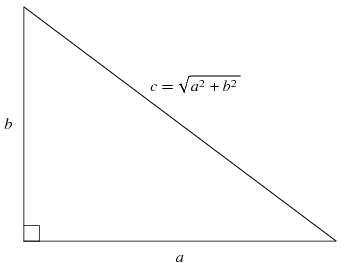

Given two $n$-dimensional vectors, the Euclidean distance can be computed by:

1. Performing an elementwise subtraction between the two vectors, to get $n$ difference values
2. Squaring each of the $n$ difference values, and summing the squares
4. Taking the square root of our sum

In mathematical terms, the distance between length-$n$ vectors $u$ and $v$ can be written as:

$
\quad\textbf{distance}(u, v) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}
$


Try implementing this in `euclidean_distance_numpy()`!

To evaluate your results, we've provided a distance computation function, `euclidean_distance_native()`, that runs on standard Python lists.

In [224]:
def euclidean_distance_native(u, v):
    # First, run some checks:
    assert isinstance(u, list)
    assert isinstance(v, list)
    assert len(u) == len(v)

    # Compute the distance!
    squared_distance = 0.0
    for i in range(len(u)):
        # Note that '**' is the exponent operator
        difference = u[i] - v[i]
        squared_distance += difference ** 2
    return squared_distance ** 0.5

In [225]:
def euclidean_distance_numpy(u, v):
    # First, run some checks:
    assert isinstance(u, np.ndarray)
    assert isinstance(v, np.ndarray)
    assert u.shape == v.shape

    # Compute the distance!
    # Note:
    #  1) You shouldn't need any loops
    #  2) Some functions that might be useful: np.sqrt(), np.sum()

    # ~~START DELETE~~
    return np.sqrt(np.sum((u - v) ** 2))
    # ~~END DELETE~~

---

Once you've implemented this algorithm, let's check that it works!

First, verify that your distance implementation gets the same results as ours:

In [226]:
# Check 2D case
a = [0.0, 0.0]
b = [3.0, 4.0]
a_array = np.array(a)
b_array = np.array(b)

print("Correct:", euclidean_distance_native(a, b))
print("Yours:", euclidean_distance_numpy(a_array, b_array))
print()

# Check 3D case
a = [1.0, 2.0, 3.0]
b = [4.0, 7.0, 1.0]
a_array = np.array(a)
b_array = np.array(b)

print("Correct:", euclidean_distance_native(a, b))
print("Yours:", euclidean_distance_numpy(a_array, b_array))
print()

Correct: 5.0
Yours: 5.0

Correct: 6.164414002968976
Yours: 6.164414002968976



---
Next, let's try timing it -- how do these two implementations compare in terms of runtime?

In [228]:
n = 100

# Create some n-dimensional arrays
a = [0.0] * n
b = [10.0] * n
a_array = np.array(a)
b_array = np.array(b)

# Compute runtime for native implementation
# Start by grabbing the current time in seconds
start_time = time.time()
for i in range(1000):
    euclidean_distance_native(a, b)
print(
    "euclidean_distance_native runtime (milliseconds): ",
    (time.time() - start_time) * 1000.0,
)

# Compute runtime for numpy implementation
# Start by grabbing the current time in seconds
start_time = time.time()
for i in range(1000):
    euclidean_distance_numpy(a_array, b_array)
print(
    "euclidean_distance_numpy runtime (milliseconds): ",
    (time.time() - start_time) * 1000.0,
)

euclidean_distance_native runtime (milliseconds):  19.573211669921875
euclidean_distance_numpy runtime (milliseconds):  20.931005477905273


---